In [8]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

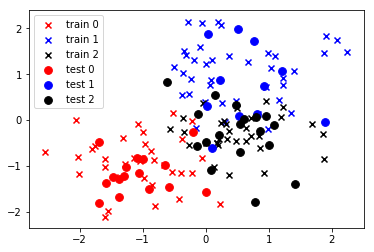

In [14]:
 np.random.seed(seed=0)
X_0 = np.random.multivariate_normal( [2,2],  [[2,0],[0,2]],  50 )
y_0 = np.zeros(len(X_0))
 
X_1 = np.random.multivariate_normal( [6,7],  [[3,0],[0,3]],  50 )
y_1 = np.ones(len(X_1))

X_2 = np.random.multivariate_normal( [6,4],  [[2,0],[0,2]],  50 )
y_2 = np.array([2]*len(X_2))
 
X = np.vstack((X_0, X_1, X_2))
y = np.concatenate([y_0, y_1, y_2])
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
 
# 特徴データを標準化(平均 0、標準偏差 1)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
 
plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_train_std[y_train==2, 0], X_train_std[y_train==2, 1], c='black', marker='x', label='train 2')

plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')
plt.scatter(X_test_std[y_test==2, 0], X_test_std[y_test==2, 1], c='black', marker='o', s=60, label='test 2')

plt.legend(loc='upper left')

In [15]:
from sklearn.linear_model import LogisticRegression
 
# 訓練
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
print (lr.predict(X_test_std))


# 精度を確認
print (lr.score(X_test_std, y_test))

[0. 2. 0. 1. 2. 1. 0. 2. 1. 0. 1. 0. 2. 1. 0. 0. 0. 0. 1. 0. 0. 2. 1. 2.
 1. 2. 0. 1. 2. 2. 0. 2. 0. 2. 0. 2. 2. 2. 0. 1. 2. 2. 1. 0. 2.]
0.8


In [17]:
print (lr.intercept_)

print (lr.coef_)

[-1.58818698 -0.95537058 -1.06305566]
[[-2.59208227 -1.64512403]
 [ 0.35779103  3.02383527]
 [ 1.40427512 -1.20667263]]


[ 2.18583979 -4.11662064]
[0.55259381 0.07929946]
[-3.20849732  1.44653532]


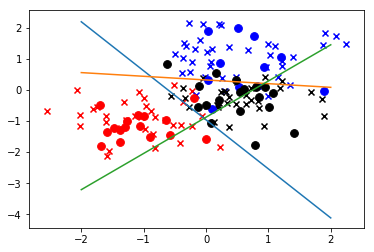

In [18]:
for i in range(0,3):
    w_0 = lr.intercept_[i]
    w_1 = lr.coef_[i][0]
    w_2 = lr.coef_[i][1]
 
    # w_1・x + w_2・y + w_0 = 0
    #   ⇒ y = (-w_1・x - w_0) / w_2
    y = (-w_1 * np.array([-2, 2]) - w_0)/w_2
    print(y)
    plt.plot([-2,2], y)
plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_train_std[y_train==2, 0], X_train_std[y_train==2, 1], c='black', marker='x', label='train 2')
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')
plt.scatter(X_test_std[y_test==2, 0], X_test_std[y_test==2, 1], c='black', marker='o', s=60, label='test 2')